In [1]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

-- Eigen3 found
-- sdl2 and SDL2_ttf found
-- Accelerate found
-- Fetching pybind11 source...
-- pybind11 v2.11.1 
-- Fetching BS::thread_pool source...
-- Fetching cli11 source...
-- Fetching roboto font...
-- Configuring done (1.4s)
-- Generating done (0.0s)
-- Build files have been written to: /Users/kou/projects/pumila/build
[ 57%] Built target pumila
[ 92%] Built target pypumila
[ 92%] Built target CLI11
[100%] Built target pumila-sim


In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
import numpy as np

In [4]:
from tqdm.notebook import tqdm

In [5]:
import random

In [6]:
model = pypumila.Pumila3.make_shared(0.01)
model_first = model.copy()
rewards = []
diffs = []
scores = []
it = 100000
with tqdm(total=it) as pbar:
    while pbar.n < it:
        sim = pypumila.GameSim()
        rnd_p = random.random()
        # print(rnd_p)
        for e in range(50):
            pbar.update()
            a = model.get_action_rnd(sim.field, rnd_p)
            model.learn_step(sim.field)
            diff = model.mean_diff
            sim.put(pypumila.actions[a])
            while not sim.is_free_phase():
                sim.step()
            reward = pypumila.Pumila2.calc_reward(sim.field)
            rewards.append(reward)
            diffs.append(diff)
            # このdiffはだいぶ前の学習結果で使ったdiffなので参考にならない
            #print(f"a = {a}, reward = {reward}, chain = {sim.field.prev_chain_num}, diff = {diff}")
        # print("reset sim")
        scores.append(sim.field.total_score)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [7]:
model.save_file()

In [9]:
import matplotlib.pyplot as plt

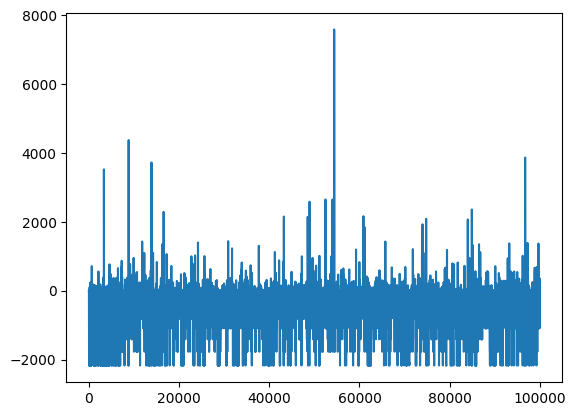

In [10]:
plt.plot(rewards)

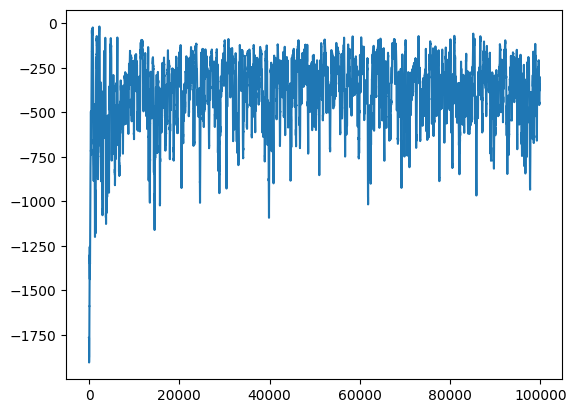

In [11]:
ar = np.array(rewards)
plt.plot([np.average(ar[i:i+100]) for i in range(len(rewards)-100)])

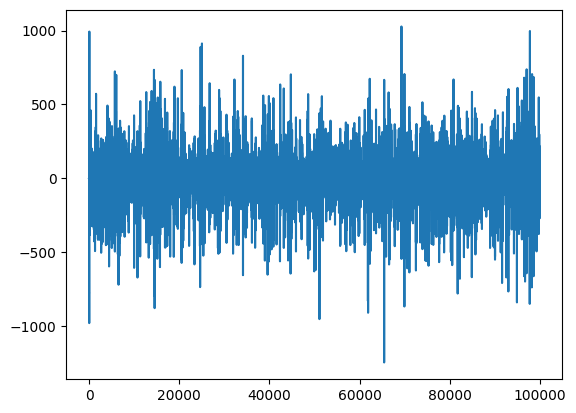

In [12]:
plt.plot(diffs)

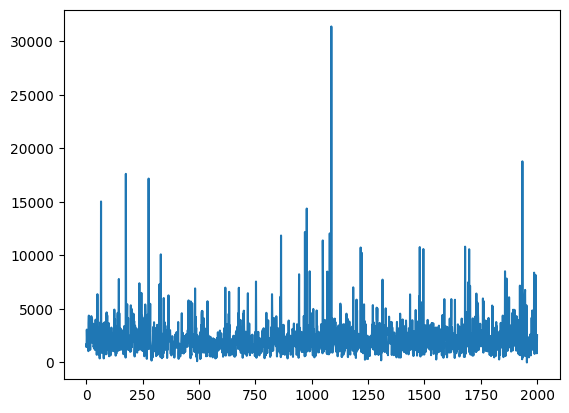

In [13]:
plt.plot(scores)

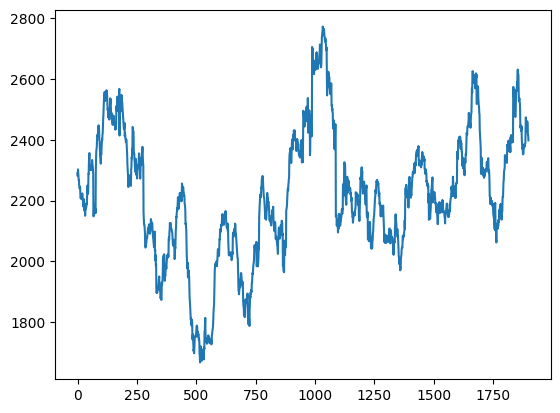

In [23]:
ar = np.array(scores)
plt.plot([np.average(ar[i:i+100]) for i in range(len(scores)-100)])

In [6]:
model = pypumila.Pumila3.make_shared(0.01)
model.load_file()

In [10]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False)

In [11]:
while True:
    a = model.get_action(sim)
    # sim.put(pypumila.actions[a])
    sim.soft_put(pypumila.actions[a])
    while sim.is_free_phase():
        win.step(True)
    while not sim.is_free_phase():
        win.step(True)
    # for i in range(15):
    #     win.step(True)
    

KeyboardInterrupt: 

In [12]:
win.quit()